In [0]:
!pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
''''train - https://drive.google.com/open?id=1uB9fkJ6iatSH1x3Kwk7T7rdKfI7PXNGQ
test - https://drive.google.com/open?id=1LTIjNYXXdJy7PwULfpUUMEEBh9m9ekjz'''

"'train - https://drive.google.com/open?id=1uB9fkJ6iatSH1x3Kwk7T7rdKfI7PXNGQ\ntest - https://drive.google.com/open?id=1LTIjNYXXdJy7PwULfpUUMEEBh9m9ekjz"

In [0]:
train_downloaded=drive.CreateFile({'id':'1uB9fkJ6iatSH1x3Kwk7T7rdKfI7PXNGQ'})
train_downloaded.GetContentFile('train.csv')
test_downloaded=drive.CreateFile({'id':'1LTIjNYXXdJy7PwULfpUUMEEBh9m9ekjz'})
test_downloaded.GetContentFile('test.csv')


In [4]:
import pandas as pd
df_train=pd.read_csv('train.csv',nrows=1000000)
df_train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [5]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [6]:
df_train.shape

(1000000, 8)

In [7]:
df_test=pd.read_csv('test.csv')
df_test.head(10)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1


In [8]:
df_test.shape
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Data **analysis**

In [9]:
df_train.isnull().sum().sort_values(ascending=False)

dropoff_latitude     10
dropoff_longitude    10
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

In [10]:
df_test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
key                  0
dtype: int64

In [0]:
df_train = df_train.drop(df_train[df_train.isnull().any(1)].index, axis = 0)


In [12]:
df_train.shape

(999990, 8)

In [13]:
df_train['fare_amount'].describe()

count    999990.000000
mean         11.347953
std           9.821790
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64

In [14]:
from collections import Counter
Counter(df_train['fare_amount']<0)

Counter({False: 999952, True: 38})

In [15]:
df_train=df_train.drop(df_train[df_train['fare_amount']<0].index,axis=0)
df_train.shape

(999952, 8)

In [16]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999952.000000,999952.000000,999952.000000,999952.000000,999952.000000,999952.000000
mean,11.348616,-72.526719,39.929050,-72.528101,39.920086,1.684942
std,9.821249,12.057786,7.626126,11.323777,8.201183,1.323908
min,0.000000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [17]:
df_train['passenger_count'].describe()

count    999952.000000
mean          1.684942
std           1.323908
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [18]:
df_train[df_train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00 UTC,0.0,0.0,0.0,0.0,208


In [19]:
df_train=df_train.drop(df_train[df_train['passenger_count']>8].index,axis=0)
df_train.shape

(999951, 8)

In [20]:
df_train['pickup_latitude'].describe()

count    999951.000000
mean         39.929090
std           7.626025
min       -3116.285383
25%          40.734965
50%          40.752695
75%          40.767154
max        2621.628430
Name: pickup_latitude, dtype: float64

Quick google will tell us that all of these longitude and latitudes are in between ranges of -90 to 90 and -180 to 180 
So we will remove the outliers

In [21]:
df_train[df_train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1


In [22]:
df_train=df_train.drop(df_train[df_train['pickup_latitude']<-90].index,axis=0)
df_train.shape

(999948, 8)

In [23]:
df_train[df_train['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
174356,2011-11-21 21:36:00.00000081,9.7,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.3,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
464025,2012-03-05 20:58:00.0000009,6.9,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.3,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.5,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
688685,2012-03-22 21:40:00.000000188,17.3,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1
708059,2012-05-24 22:44:00.00000088,5.3,2012-05-24 22:44:00 UTC,-73.989188,91.266667,-73.982362,40.763105,1
970268,2012-04-12 07:31:00.00000027,5.7,2012-04-12 07:31:00 UTC,-73.957087,424.083332,-73.968312,40.765117,1


In [24]:
df_train=df_train.drop(df_train[df_train['pickup_latitude']>90].index,axis=0)
df_train.shape

(999939, 8)

In [25]:
df_train['pickup_longitude'].describe()

count    999939.000000
mean        -72.525443
std          10.692752
min       -1452.988333
25%         -73.992060
50%         -73.981792
75%         -73.967095
max          40.850357
Name: pickup_longitude, dtype: float64

In [26]:
df_train[df_train['pickup_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [27]:
df_train[df_train['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00 UTC,-736.550000,40.738230,-73.988742,40.748847,1
217355,2012-06-03 23:21:00.00000077,6.1,2012-06-03 23:21:00 UTC,-740.000000,40.747620,0.000000,0.000000,6
243342,2012-08-02 10:38:00.000000111,7.3,2012-08-02 10:38:00 UTC,-736.333333,40.766480,-73.987928,40.751742,3
351119,2012-02-03 07:53:00.000000135,4.1,2012-02-03 07:53:00 UTC,-736.483332,40.766512,-73.981992,40.771672,1
370663,2012-05-04 23:19:00.000000261,6.1,2012-05-04 23:19:00 UTC,-736.516667,40.719095,-74.003952,40.729860,1
416859,2012-07-21 15:23:00.00000093,6.5,2012-07-21 15:23:00 UTC,-736.416665,40.752285,-73.992565,40.742687,1
568830,2013-05-23 15:23:00.0000007,11.5,2013-05-23 15:23:00 UTC,-735.888333,40.760863,-73.989835,40.738443,5
675500,2011-10-28 10:53:00.00000080,16.9,2011-10-28 10:53:00 UTC,-1452.988333,40.776000,-73.989487,40.740667,2
837619,2012-07-17 08:38:00.000000116,39.7,2012-07-17 08:38:00 UTC,-736.000000,40.758507,0.000000,0.000000,5
914435,2012-03-04 00:10:00.000000131,11.7,2012-03-04 00:10:00 UTC,-736.250000,40.788027,-73.990812,40.750942,1


In [28]:
df_train = df_train.drop(((df_train[df_train['pickup_longitude']<-180])|(df_train[df_train['pickup_longitude']>180])).index, axis=0)
df_train.shape

(999928, 8)

In [30]:
df_train['dropoff_latitude'].describe()

count    999928.000000
mean         39.926691
std           7.104385
min       -3114.338567
25%          40.734047
50%          40.753166
75%          40.768129
max        1651.553433
Name: dropoff_latitude, dtype: float64

In [31]:
df_train[df_train['dropoff_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
579901,2013-08-14 20:23:00.000000245,18.0,2013-08-14 20:23:00 UTC,-73.99919,40.7202,-0.36,-3114.338567,1


In [32]:
df_train[df_train['dropoff_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
92310,2011-09-27 11:54:00.000000127,28.9,2011-09-27 11:54:00 UTC,-74.014595,40.681880,-73.973310,404.616667,1
181973,2012-01-03 09:04:00.000000130,6.5,2012-01-03 09:04:00 UTC,-74.008918,40.717827,-74.000855,404.133332,1
335675,2012-02-26 00:25:00.00000085,19.3,2012-02-26 00:25:00 UTC,-74.006457,40.743865,-73.981283,404.133332,1
561910,2010-08-14 03:42:59.0000001,4.5,2010-08-14 03:42:59 UTC,-73.977635,40.754687,-73.870432,405.650000,1
582110,2012-05-02 14:20:00.000000131,30.5,2012-05-02 14:20:00 UTC,-73.870875,40.773792,-73.977790,404.716667,1
748464,2013-01-02 11:33:00.00000020,15.0,2013-01-02 11:33:00 UTC,-74.015200,40.709665,-40.719295,1651.553433,5
889704,2012-05-21 12:15:00.00000098,15.3,2012-05-21 12:15:00 UTC,-74.001292,40.727560,-73.953047,404.466667,1


In [33]:
df_train=df_train.drop(((df_train[df_train['dropoff_latitude']>90])|df_train[df_train['dropoff_latitude']<-90]).index,axis=0)
df_train.shape

(999920, 8)

In [34]:
df_train[df_train['dropoff_longitude']>180]  

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [35]:
df_train[df_train['dropoff_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
269695,2012-05-24 09:00:00.000000101,17.7,2012-05-24 09:00:00 UTC,-73.997572,40.720945,-1329.621332,40.773717,1
282374,2011-04-25 13:09:00.000000123,5.7,2011-04-25 13:09:00 UTC,-73.987105,40.755732,-732.600000,40.744832,1
449263,2012-01-28 16:51:00.00000088,6.9,2012-01-28 16:51:00 UTC,-73.983142,40.741987,-736.500000,40.755255,1
472273,2012-02-09 17:42:00.000000250,49.8,2012-02-09 17:42:00 UTC,-73.937167,40.758112,-736.083333,40.758112,6
666352,2012-03-16 22:02:00.000000257,4.9,2012-03-16 22:02:00 UTC,-73.992605,40.726815,-472.266667,40.733332,1
757003,2012-04-29 20:45:00.000000211,3.3,2012-04-29 20:45:00 UTC,-73.990675,40.761037,-736.550000,40.760182,5
858760,2012-06-19 07:41:00.00000019,6.1,2012-06-19 07:41:00 UTC,-73.982467,40.771612,-736.416665,40.764310,1
907792,2012-02-18 00:22:00.0000001,8.1,2012-02-18 00:22:00 UTC,-73.991215,40.750727,-740.000000,40.726617,1
967162,2012-02-09 17:42:00.000000178,5.7,2012-02-09 17:42:00 UTC,-74.006390,40.739552,-740.066667,40.724792,1


In [38]:
df_train=df_train.drop(((df_train[df_train['dropoff_longitude']>180])|df_train[df_train['dropoff_latitude']<-180]).index,axis=0)
df_train.shape

(999911, 8)

In [37]:
df_train=df_train.drop(df_train[df_train['dropoff_longitude']<-180].index,axis=0)
df_train.shape

(999911, 8)

In [39]:
df_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [40]:
df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [0]:
df_train['key'] = pd.to_datetime(df_train['key'])
df_train['pickup_datetime']  = pd.to_datetime(df_train['pickup_datetime'])

In [0]:
df_test['key'] = pd.to_datetime(df_test['key'])
df_test['pickup_datetime']  = pd.to_datetime(df_test['pickup_datetime'])

In [43]:
df_train.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [44]:
import gc
gc.collect()

958

In [45]:
df_test.dtypes

key                  datetime64[ns]
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [46]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


Now, for EDA. The following are my considerations -

Does the number of passengers affect the fare?
Does the date and time of pickup affect the fare?
Does the day of the week affect the fare?
Does the distance travelled affect the fare?
First, let's split the datetime field 'pickup_datetime' to the following -

year
month
date
hour
day of week
Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare. Also, create a new field 'distance' to fetch the distance between the pickup and the drop.
We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance


In [0]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [df_train, df_test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
        return d

In [48]:
import numpy as np
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0          1.030764
1          8.450134
2          1.389525
3          2.799270
4          1.999157
5          3.787239
6          1.555807
7          4.155444
8          1.253232
9          2.849627
10         1.374577
11         0.000000
12         0.717767
13         2.019384
14         1.671445
15         0.000000
16         2.609774
17         1.511904
18         0.921952
19         0.399179
20         1.686861
21         2.292470
22         0.924296
23         1.403958
24         1.017773
25         2.531947
26         0.000000
27         0.328771
28         4.073463
29         0.808153
            ...    
999970     1.800660
999971    16.888650
999972     0.443274
999973     0.509990
999974     6.774274
999975     9.357706
999976     4.093045
999977     5.314221
999978     1.842736
999979     3.689741
999980     4.456025
999981     3.622864
999982     1.162477
999983     0.806466
999984     8.401025
999985     1.344648
999986     0.821492
999987     0.240398
999988     0.000000


In [49]:
df_train['H_Distance'].head()
df_train.shape

(999911, 9)

In [0]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [df_test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
        return d

In [51]:
import numpy as np
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [52]:
df_test['H_Distance'].head()

0    2.323260
1    2.425353
2    0.618628
3    1.961033
4    5.387301
Name: H_Distance, dtype: float64

In [53]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301


In [0]:
data = [df_train]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour
    i['Minutes']=i['pickup_datetime'].dt.minute
    

In [0]:
data = [df_test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour
    i['Minutes']=i['pickup_datetime'].dt.minute

In [56]:
df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,Minutes
0,2009-06-15 17:26:21.000000100,4.50,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17,26
1,2010-01-05 16:52:16.000000200,16.90,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16,52
2,2011-08-18 00:35:00.000000490,5.70,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0,35
3,2012-04-21 04:30:42.000000100,7.70,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4,30
4,2010-03-09 07:51:00.000000135,5.30,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7,51
5,2011-01-06 09:50:45.000000200,12.10,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787239,2011,1,6,3,9,50
6,2012-11-20 20:35:00.000000100,7.50,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.555807,2012,11,20,1,20,35
7,2012-01-04 17:22:00.000000810,16.50,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.155444,2012,1,4,2,17,22
8,2012-12-03 13:10:00.000000125,9.00,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.253232,2012,12,3,0,13,10
9,2009-09-02 01:11:00.000000830,8.90,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.849627,2009,9,2,2,1,11


In [57]:
df_train['Hour'].describe()

count    999911.000000
mean         13.509595
std           6.513805
min           0.000000
25%           9.000000
50%          14.000000
75%          19.000000
max          23.000000
Name: Hour, dtype: float64

In [58]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,Minutes
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13,8
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13,8
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11,53
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21,12
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21,12


In [59]:
df_test['Hour'].describe()

count    9914.000000
mean       13.467420
std         6.868584
min         0.000000
25%         8.000000
50%        15.000000
75%        19.000000
max        23.000000
Name: Hour, dtype: float64

In [0]:
data = [df_train]
for i in data:
    i['is_night_time']=[1 if (i==0 or i>=19)  else 0 for i in df_train['Hour']]
    i['late_night_time']=[1 if (i<5 or i>0)  else 0 for i in df_train['Hour']]
    i['weather']=[1 if (i in [1,2,3]) else(2 if (i in [4,11,12]) else 3) for i in df_train['Month']]
    i['quarter']=i['pickup_datetime'].dt.quarter
    i['center_lat']=(df_train['dropoff_latitude']-df_train['pickup_latitude'])/2
    i['center_long']=(df_train['dropoff_longitude']-df_train['pickup_longitude'])/2

In [61]:
df_train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,...,15,0,17,26,0,1,3,2,-0.004520,0.001351
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,...,5,1,16,52,0,1,1,1,0.035350,0.018390
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,...,18,3,0,35,1,1,3,3,-0.005354,-0.004252
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,...,21,5,4,30,0,1,2,2,0.012474,-0.002218
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,...,9,1,7,51,0,1,1,1,0.007877,0.005720
5,2011-01-06 09:50:45.000000200,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787239,2011,...,6,3,9,50,0,1,1,1,0.013302,0.014036
6,2012-11-20 20:35:00.000000100,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.555807,2012,...,20,1,20,35,1,1,2,4,0.006590,0.003100
7,2012-01-04 17:22:00.000000810,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.155444,2012,...,4,2,17,22,0,1,1,1,-0.011545,-0.019397
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.253232,2012,...,3,0,13,10,0,1,2,4,0.002457,0.006692
9,2009-09-02 01:11:00.000000830,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.849627,2009,...,2,2,1,11,0,1,3,3,0.012133,-0.005441


In [62]:
df_train['late_night_time'].describe()

count    999911.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: late_night_time, dtype: float64

In [0]:
df_test['is_night_time']=[1 if (i==0 or i>=19)  else 0 for i in df_test['pickup_datetime'].dt.hour]
df_test['late_night_time']=[1 if (i<5 or i>0)  else 0 for i in df_test['pickup_datetime'].dt.hour]
df_test['weather']=[1 if (i in [1,2,3]) else(2 if (i in [4,11,12]) else 3) for i in df_test['Month']]
df_test['quarter']=df_test.pickup_datetime.dt.quarter
df_test['center_lat']=(df_test['dropoff_latitude']-df_test['pickup_latitude'])/2
df_test['center_long']=(df_test['dropoff_longitude']-df_test['pickup_longitude'])/2

In [64]:
df_test.head(10)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13,8,0,1,1,1,-0.009985,-0.004055
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13,8,0,1,1,1,0.009909,-0.006012
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11,53,0,1,3,4,-0.002560,0.001435
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21,12,1,1,2,4,-0.008086,-0.004644
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21,12,1,1,2,4,-0.022674,-0.011260
5,2012-12-01 21:12:12.000000500,2012-12-01 21:12:12,-73.960983,40.765547,-73.979177,40.740053,1,3.222549,2012,12,1,5,21,12,1,1,2,4,-0.012747,-0.009097
6,2011-10-06 12:10:20.000000100,2011-10-06 12:10:20,-73.949013,40.773204,-73.959622,40.770893,1,0.929601,2011,10,6,3,12,10,0,1,3,4,-0.001155,-0.005305
7,2011-10-06 12:10:20.000000300,2011-10-06 12:10:20,-73.777282,40.646636,-73.985083,40.759368,1,21.540102,2011,10,6,3,12,10,0,1,3,4,0.056366,-0.103900
8,2011-10-06 12:10:20.000000200,2011-10-06 12:10:20,-74.014099,40.709638,-73.995106,40.741365,1,3.873962,2011,10,6,3,12,10,0,1,3,4,0.015864,0.009496
9,2014-02-18 15:22:20.000000200,2014-02-18 15:22:20,-73.969582,40.765519,-73.980686,40.770725,1,1.099794,2014,2,18,1,15,22,0,1,1,1,0.002603,-0.005552


In [0]:
df_train.to_csv('train_updated.csv',index=False)

In [0]:
df_test.to_csv('test_updated.csv',index=False)

In [67]:
df_train.shape

(999911, 21)

In [0]:
import pandas as pd
train=pd.read_csv('train_updated.csv')

In [0]:
test=pd.read_csv('test_updated.csv')

In [70]:
train.shape

(999911, 21)

In [71]:
test.shape

(9914, 20)

In [0]:
import matplotlib.pyplot as plt

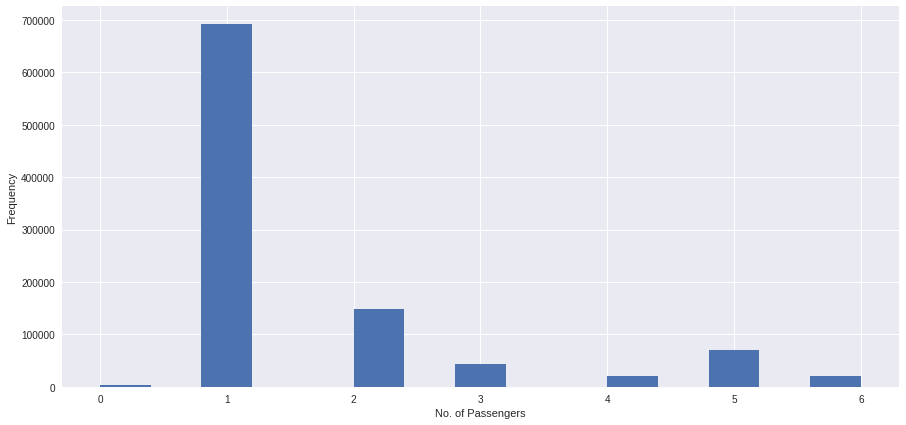

In [73]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'],bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')
plt.show()

In [74]:
train['passenger_count'].describe()

count    999911.000000
mean          1.684734
std           1.307722
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [75]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,...,15,0,17,26,0,1,3,2,-0.004520,0.001351
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,...,5,1,16,52,0,1,1,1,0.035350,0.018390
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,...,18,3,0,35,1,1,3,3,-0.005354,-0.004252
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,...,21,5,4,30,0,1,2,2,0.012474,-0.002218
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,...,9,1,7,51,0,1,1,1,0.007877,0.005720


In [76]:
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
897129,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30,0.0,0.0,-73.937698,40.758118,1,8662.340373,2015,...,8,2,0,47,1,1,2,2,20.379059,-36.968849


In [0]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [78]:
#Check in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long


In [0]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [80]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,...,22,6,22,48,1,1,1,1,20.363343,-37.002716
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,...,10,3,20,25,1,1,1,1,-20.377371,36.986953
2279,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,...,29,0,8,24,0,1,3,3,0.000000,36.968333
2396,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,...,24,6,17,11,0,1,3,2,20.357277,-37.005115
4276,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,...,7,1,23,33,1,1,2,2,-20.378712,36.986351
4595,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,...,30,1,7,12,0,1,1,1,20.377140,-36.994847
5861,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012,...,4,6,1,35,0,1,1,1,-0.007504,33.004195
6185,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014,...,28,0,15,4,0,1,3,3,20.393335,-36.976490
6299,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015,...,27,4,16,18,0,1,1,1,20.398272,-36.968300
7011,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011,...,18,5,4,3,0,1,3,2,-19.996805,-0.006047


In [81]:
high_distance.shape

(1929, 21)

In [82]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,...,22,6,22,48,1,1,1,1,20.363343,-37.002716
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,...,10,3,20,25,1,1,1,1,-20.377371,36.986953
2279,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,...,29,0,8,24,0,1,3,3,0.000000,36.968333
2396,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,...,24,6,17,11,0,1,3,2,20.357277,-37.005115
4276,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,...,7,1,23,33,1,1,2,2,-20.378712,36.986351
4595,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010,...,30,1,7,12,0,1,1,1,20.377140,-36.994847
5861,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012,...,4,6,1,35,0,1,1,1,-0.007504,33.004195
6185,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014,...,28,0,15,4,0,1,3,3,20.393335,-36.976490
6299,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015,...,27,4,16,18,0,1,1,1,20.398272,-36.968300
7011,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011,...,18,5,4,3,0,1,3,2,-19.996805,-0.006047


In [0]:
train.update(high_distance)

In [85]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
105038,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,...,21.0,2.0,21.0,41.0,1.0,1.0,3.0,3.0,0.0,0.0
331567,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54,-73.982354,40.679971,-73.982354,40.679971,1.0,0.0,2013.0,...,5.0,0.0,6.0,45.0,0.0,1.0,3.0,3.0,0.0,0.0
436619,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39,-74.043442,40.788208,-74.043442,40.788208,1.0,0.0,2015.0,...,4.0,2.0,22.0,33.0,1.0,1.0,1.0,1.0,0.0,0.0
689186,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03,-73.994125,40.741131,-73.994125,40.741131,1.0,0.0,2015.0,...,27.0,2.0,23.0,10.0,1.0,1.0,3.0,2.0,0.0,0.0


In [0]:
train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [87]:
train[(train['H_Distance']==0)].shape


(28663, 21)

In [88]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long


In [89]:
#Between 6AM and 8PM on Mon-Fri
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
830543,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,...,21.0,2.0,6.0,29.0,0.0,1.0,1.0,1.0,0.0,0.0
925807,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,...,21.0,2.0,14.0,12.0,0.0,1.0,1.0,1.0,0.0,0.0


In [0]:
train=train.drop(rush_hour.index, axis=0)

In [91]:
train.shape

(999901, 21)

In [92]:
#Between 8PM and 6AM on Mon-Fri
non_rush_hour = train.loc[(((train['Hour']<6)|(train['Hour']>20)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0))]
#print(Counter(non_work_hours['Hour']))
#print(Counter(non_work_hours['Day of Week']))
non_rush_hour
#keep these. Since the fare_amount is not <2.5 (which is the base fare), these values seem legit to me.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,...,29.0,3.0,5.0,57.0,0.0,1.0,3.0,2.0,0.000000,0.000000
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,...,19.0,1.0,1.0,10.0,0.0,1.0,1.0,1.0,0.000000,0.000000
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,...,25.0,1.0,1.0,50.0,0.0,1.0,3.0,3.0,0.000000,0.000000
3166,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,...,6.0,4.0,22.0,7.0,1.0,1.0,3.0,3.0,0.000000,0.000000
12950,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,...,23.0,4.0,3.0,30.0,0.0,1.0,3.0,3.0,0.000000,0.000000
16070,2013-05-30 00:19:40.000000100,2.5,2013-05-30 00:19:40,-73.782520,40.644488,-73.782520,40.644488,1.0,0.0,2013.0,...,30.0,3.0,0.0,19.0,1.0,1.0,3.0,2.0,0.000000,0.000000
17858,2014-08-21 23:28:26.000000200,2.5,2014-08-21 23:28:26,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,...,21.0,3.0,23.0,28.0,1.0,1.0,3.0,3.0,0.000000,0.000000
18033,2009-01-07 22:16:00.000000172,2.5,2009-01-07 22:16:00,-73.992220,40.759068,-73.992220,40.759068,2.0,0.0,2009.0,...,7.0,2.0,22.0,16.0,1.0,1.0,1.0,1.0,0.000000,0.000000
24831,2015-02-27 02:23:09.000000400,2.5,2015-02-27 02:23:09,-73.983330,40.738205,-73.983330,40.738205,1.0,0.0,2015.0,...,27.0,4.0,2.0,23.0,0.0,1.0,1.0,1.0,0.000000,0.000000
29608,2009-06-17 03:14:11.000000100,2.5,2009-06-17 03:14:11,-73.934842,40.740996,-73.934842,40.740996,1.0,0.0,2009.0,...,17.0,2.0,3.0,14.0,0.0,1.0,3.0,2.0,0.000000,0.000000


In [93]:
#Saturday and Sunday all hours
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0)]
weekends
#keep these too. Since the fare_amount is not <2.5, these values seem legit to me.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,...,22.0,6.0,22.0,48.0,1.0,1.0,1.0,1.0,20.363343,-37.002716
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,...,21.0,6.0,0.0,10.0,1.0,1.0,3.0,3.0,0.000000,0.000000
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,...,27.0,0.0,15.0,24.0,0.0,1.0,3.0,3.0,0.000000,0.000000
4365,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,...,13.0,0.0,16.0,14.0,0.0,1.0,1.0,1.0,0.000000,0.000000
4952,2010-01-10 13:44:35.000000700,2.5,2010-01-10 13:44:35,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,...,10.0,6.0,13.0,44.0,0.0,1.0,1.0,1.0,0.000000,0.000000
6294,2010-11-15 09:29:00.000000191,2.5,2010-11-15 09:29:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,...,15.0,0.0,9.0,29.0,0.0,1.0,2.0,4.0,0.000000,0.000000
9174,2010-12-06 11:48:34.000000500,2.5,2010-12-06 11:48:34,-73.946993,40.744583,-73.946993,40.744583,3.0,0.0,2010.0,...,6.0,0.0,11.0,48.0,0.0,1.0,2.0,4.0,0.000000,0.000000
9618,2015-03-01 22:39:54.000000100,2.5,2015-03-01 22:39:54,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,...,1.0,6.0,22.0,39.0,1.0,1.0,1.0,1.0,0.000000,0.000000
11590,2010-10-17 04:28:00.000000150,2.9,2010-10-17 04:28:00,-73.851972,40.679820,-73.851972,40.679820,5.0,0.0,2010.0,...,17.0,6.0,4.0,28.0,0.0,1.0,3.0,4.0,0.000000,0.000000
13567,2009-03-09 12:26:25.000000100,2.5,2009-03-09 12:26:25,-73.416169,40.784140,-73.416169,40.784140,1.0,0.0,2009.0,...,9.0,0.0,12.0,26.0,0.0,1.0,1.0,1.0,0.000000,0.000000


In [94]:
train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
9999,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,...,15.0,0.0,14.0,26.0,0.0,1.0,1.0,1.0,-0.012424,-0.009398
27887,2015-05-15 21:40:28.000000100,0.0,2015-05-15 21:40:28,-74.077927,40.805714,-74.077919,40.805721,1.0,0.001064,2015.0,...,15.0,4.0,21.0,40.0,1.0,1.0,3.0,2.0,0.000004,0.000004
47295,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,...,18.0,3.0,19.0,13.0,1.0,1.0,1.0,1.0,-0.000070,-0.000059
175335,2014-06-29 16:04:29.000000200,0.0,2014-06-29 16:04:29,-73.484480,40.813401,-73.484442,40.813323,2.0,0.009244,2014.0,...,29.0,6.0,16.0,4.0,0.0,1.0,3.0,2.0,-0.000039,0.000019
211435,2015-04-15 14:02:39.000000300,0.0,2015-04-15 14:02:39,-73.937378,40.758450,-73.937447,40.758450,1.0,0.005783,2015.0,...,15.0,2.0,14.0,2.0,0.0,1.0,2.0,2.0,0.000000,-0.000034
211479,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00,-73.937353,40.758227,-73.937358,40.758230,1.0,0.000537,2010.0,...,8.0,0.0,18.0,22.0,0.0,1.0,1.0,1.0,0.000001,-0.000002
266462,2010-02-20 09:51:27.000000400,0.0,2010-02-20 09:51:27,-73.877376,40.772415,-73.877403,40.772391,1.0,0.003506,2010.0,...,20.0,5.0,9.0,51.0,0.0,1.0,1.0,1.0,-0.000012,-0.000014
386700,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,...,8.0,4.0,7.0,2.0,0.0,1.0,3.0,2.0,-0.002064,-0.001530
431781,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,2.999630,2015.0,...,13.0,1.0,0.0,48.0,1.0,1.0,1.0,1.0,-0.005247,-0.016403
489722,2015-02-14 21:06:53.000000700,0.0,2015-02-14 21:06:53,-73.949951,40.776215,-73.949959,40.776218,2.0,0.000770,2015.0,...,14.0,5.0,21.0,6.0,1.0,1.0,1.0,1.0,0.000002,-0.000004


In [0]:
scenario_3 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [96]:
len(scenario_3)

21

In [97]:
#We do not have any distance values that are outliers.
scenario_3.sort_values('H_Distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
788394,2010-02-26 22:10:53.000000200,0.0,2010-02-26 22:10:53,-73.812794,40.695922,-73.993577,40.749743,1.0,16.368200,2010.0,...,26.0,4.0,22.0,10.0,1.0,1.0,1.0,1.0,0.026911,-0.090392
762730,2015-02-04 23:47:28.000000600,0.0,2015-02-04 23:47:28,-73.864532,40.770012,-74.030937,40.727139,1.0,14.806275,2015.0,...,4.0,2.0,23.0,47.0,1.0,1.0,1.0,1.0,-0.021437,-0.083202
561733,2013-08-26 00:22:00.000000580,0.0,2013-08-26 00:22:00,-73.988468,40.722775,-73.923687,40.807775,1.0,10.913162,2013.0,...,26.0,0.0,0.0,22.0,1.0,1.0,3.0,3.0,0.042500,0.032391
9999,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,...,15.0,0.0,14.0,26.0,0.0,1.0,1.0,1.0,-0.012424,-0.009398
431781,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,2.999630,2015.0,...,13.0,1.0,0.0,48.0,1.0,1.0,1.0,1.0,-0.005247,-0.016403
895281,2010-02-08 23:39:17.000000200,0.0,2010-02-08 23:39:17,-73.880422,40.741431,-73.873903,40.742301,1.0,0.557666,2010.0,...,8.0,0.0,23.0,39.0,1.0,1.0,1.0,1.0,0.000435,0.003259
386700,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,...,8.0,4.0,7.0,2.0,0.0,1.0,3.0,2.0,-0.002064,-0.001530
520666,2015-03-28 18:14:09.000000110,0.0,2015-03-28 18:14:09,-73.987694,40.764881,-73.990150,40.761581,4.0,0.421227,2015.0,...,28.0,5.0,18.0,14.0,0.0,1.0,1.0,1.0,-0.001650,-0.001228
760590,2015-05-24 03:16:52.000000200,0.0,2015-05-24 03:16:52,-74.001633,40.730762,-73.999748,40.733494,1.0,0.342713,2015.0,...,24.0,6.0,3.0,16.0,0.0,1.0,3.0,2.0,0.001366,0.000942
47295,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,...,18.0,3.0,19.0,13.0,1.0,1.0,1.0,1.0,-0.000070,-0.000059


In [99]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
scenario_3['fare_amount']

9999       7.468230
27887      2.501660
47295      2.528736
175335     2.514421
211435     2.509022
211479     2.500838
266462     2.505469
386700     3.321137
431781     7.179423
489722     2.501201
495228     2.500662
520666     3.157114
561733    19.524533
670192     2.500662
681279     2.501577
760590     3.034632
762730    25.597788
788394    28.034391
895281     3.369958
937934     2.501202
957504     2.505506
Name: fare_amount, dtype: float64

In [0]:
train.update(scenario_3)

In [102]:
train.shape

(999901, 21)

In [103]:
train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,...,24.0,0.0,11.0,24.0,0.0,1.0,2.0,4.0,0.000000,0.000000
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,...,23.0,5.0,12.0,57.0,0.0,1.0,2.0,4.0,0.000000,0.000000
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,...,7.0,0.0,20.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,...,25.0,2.0,0.0,8.0,1.0,1.0,1.0,1.0,0.000000,0.000000
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,...,17.0,3.0,17.0,22.0,0.0,1.0,1.0,1.0,0.000000,0.000000
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,...,8.0,2.0,21.0,55.0,1.0,1.0,1.0,1.0,0.000000,0.000000
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,...,5.0,6.0,17.0,8.0,0.0,1.0,3.0,3.0,0.000000,0.000000
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,...,24.0,6.0,1.0,14.0,0.0,1.0,3.0,3.0,0.000000,0.000000
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,...,25.0,5.0,1.0,53.0,0.0,1.0,3.0,3.0,0.000000,0.000000
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,...,30.0,4.0,18.0,13.0,0.0,1.0,3.0,4.0,0.000000,0.000000


In [104]:
train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,...,24.0,0.0,11.0,24.0,0.0,1.0,2.0,4.0,0.000000,0.000000
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,...,23.0,5.0,12.0,57.0,0.0,1.0,2.0,4.0,0.000000,0.000000
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,...,7.0,0.0,20.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,...,25.0,2.0,0.0,8.0,1.0,1.0,1.0,1.0,0.000000,0.000000
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,...,17.0,3.0,17.0,22.0,0.0,1.0,1.0,1.0,0.000000,0.000000
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,...,8.0,2.0,21.0,55.0,1.0,1.0,1.0,1.0,0.000000,0.000000
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,...,5.0,6.0,17.0,8.0,0.0,1.0,3.0,3.0,0.000000,0.000000
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,...,24.0,6.0,1.0,14.0,0.0,1.0,3.0,3.0,0.000000,0.000000
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,...,25.0,5.0,1.0,53.0,0.0,1.0,3.0,3.0,0.000000,0.000000
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,...,30.0,4.0,18.0,13.0,0.0,1.0,3.0,4.0,0.000000,0.000000


In [0]:
scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [106]:
len(scenario_4)

28661

In [107]:
#Using our prior knowledge about the base price during weekdays and weekends for the cabs.
#I do not want to impute these 1502 values as they are legible ones.
scenario_4.loc[(scenario_4['fare_amount']<=3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,...,29.0,3.0,5.0,57.0,0.0,1.0,3.0,2.0,0.000000,0.000000
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,...,22.0,6.0,22.0,48.0,1.0,1.0,1.0,1.0,20.363343,-37.002716
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,...,19.0,1.0,1.0,10.0,0.0,1.0,1.0,1.0,0.000000,0.000000
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,...,25.0,1.0,1.0,50.0,0.0,1.0,3.0,3.0,0.000000,0.000000
799,2013-12-08 23:39:00.000000800,3.0,2013-12-08 23:39:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2013.0,...,8.0,6.0,23.0,39.0,1.0,1.0,2.0,4.0,0.000000,0.000000
958,2011-02-22 14:09:00.000000660,2.5,2011-02-22 14:09:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2011.0,...,22.0,1.0,14.0,9.0,0.0,1.0,1.0,1.0,0.000000,0.000000
1419,2013-07-21 00:10:23.000000100,2.5,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,...,21.0,6.0,0.0,10.0,1.0,1.0,3.0,3.0,0.000000,0.000000
1774,2012-08-27 15:24:00.000000700,2.5,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,...,27.0,0.0,15.0,24.0,0.0,1.0,3.0,3.0,0.000000,0.000000
3166,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,...,6.0,4.0,22.0,7.0,1.0,1.0,3.0,3.0,0.000000,0.000000
4365,2014-01-13 16:14:48.000000100,2.5,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,...,13.0,0.0,16.0,14.0,0.0,1.0,1.0,1.0,0.000000,0.000000


In [108]:
scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,...,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,...,24.0,0.0,11.0,24.0,0.0,1.0,2.0,4.0,0.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,...,23.0,5.0,12.0,57.0,0.0,1.0,2.0,4.0,0.0,0.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,...,7.0,0.0,20.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,...,25.0,2.0,0.0,8.0,1.0,1.0,1.0,1.0,0.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,...,17.0,3.0,17.0,22.0,0.0,1.0,1.0,1.0,0.0,0.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,...,8.0,2.0,21.0,55.0,1.0,1.0,1.0,1.0,0.0,0.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,...,5.0,6.0,17.0,8.0,0.0,1.0,3.0,3.0,0.0,0.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,...,24.0,6.0,1.0,14.0,0.0,1.0,3.0,3.0,0.0,0.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,...,25.0,5.0,1.0,53.0,0.0,1.0,3.0,3.0,0.0,0.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,...,30.0,4.0,18.0,13.0,0.0,1.0,3.0,4.0,0.0,0.0


In [0]:
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]

In [110]:
len(scenario_4_sub)

27159

In [111]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
train.update(scenario_4_sub)

In [113]:
train.shape

(999901, 21)

In [114]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Date', 'Day of Week',
       'Hour', 'Minutes', 'is_night_time', 'late_night_time', 'weather',
       'quarter', 'center_lat', 'center_long'],
      dtype='object')

In [115]:
test.columns

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour', 'Minutes',
       'is_night_time', 'late_night_time', 'weather', 'quarter', 'center_lat',
       'center_long'],
      dtype='object')

In [0]:
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [0]:
x_train = train.iloc[:,train.columns!='fare_amount']
y_train = train['fare_amount'].values
x_test = test

In [118]:
import numpy as np
x_train.head()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long
0,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009.0,6.0,15.0,0.0,17.0,26.0,0.0,1.0,3.0,2.0,-0.004520,0.001351
1,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010.0,1.0,5.0,1.0,16.0,52.0,0.0,1.0,1.0,1.0,0.035350,0.018390
2,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011.0,8.0,18.0,3.0,0.0,35.0,1.0,1.0,3.0,3.0,-0.005354,-0.004252
3,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270,2012.0,4.0,21.0,5.0,4.0,30.0,0.0,1.0,2.0,2.0,0.012474,-0.002218
4,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010.0,3.0,9.0,1.0,7.0,51.0,0.0,1.0,1.0,1.0,0.007877,0.005720


In [119]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
Xtr, Xv, ytr, yv = train_test_split(x_train, y_train, test_size=0.2, random_state=1996)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
dtrain = xgb.DMatrix(Xtr, label=ytr)

In [0]:
dvalid = xgb.DMatrix(Xv, label=yv)
#dtest = xgb.DMatrix(test[feature_names].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

#From beluga's kernel
xgb_pars = {'min_child_weight': 10, 'eta': 0.03, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 0.5, 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [122]:
model= xgb.train(xgb_pars, dtrain, 100000, watchlist, early_stopping_rounds=90,
                  maximize=False, verbose_eval=100)


[0]	train-rmse:14.263	valid-rmse:14.2577
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 90 rounds.
[100]	train-rmse:3.94111	valid-rmse:4.30268
[200]	train-rmse:3.37625	valid-rmse:3.88254
[300]	train-rmse:3.20294	valid-rmse:3.79969
[400]	train-rmse:3.10352	valid-rmse:3.76231
[500]	train-rmse:3.03812	valid-rmse:3.74324
[600]	train-rmse:2.98551	valid-rmse:3.73296
[700]	train-rmse:2.94018	valid-rmse:3.72549
[800]	train-rmse:2.90398	valid-rmse:3.72152
[900]	train-rmse:2.86888	valid-rmse:3.71668
[1000]	train-rmse:2.8369	valid-rmse:3.71295
[1100]	train-rmse:2.80244	valid-rmse:3.70791
[1200]	train-rmse:2.77454	valid-rmse:3.70595
[1300]	train-rmse:2.74462	valid-rmse:3.70339
[1400]	train-rmse:2.71724	valid-rmse:3.70206
[1500]	train-rmse:2.69422	valid-rmse:3.70202
Stopping. Best iteration:
[1447]	train-rmse:2.70598	valid-rmse:3.70112



In [0]:
import pickle
pickle.dump(model,open('xgb.sav','wb'))

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtr,ytr)

In [0]:
rf_predict = rf.predict(x_test)
import pickle
pickle.dump(model,open('random.sav','wb'))

In [127]:
print('Modeling RMSLE %.5f' % model.best_score)


Modeling RMSLE 3.70112


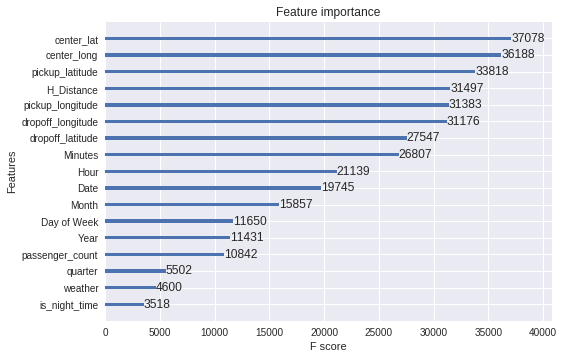

In [124]:
xgb.plot_importance(model, ax=None, height=0.2, xlim=None,
                    ylim=None, title='Feature importance',
                    xlabel='F score', ylabel='Features',
                    importance_type='weight', max_num_features=None,
                    grid=True)
plt.show()

In [0]:
model=pickle.load(open('xgb.sav','rb'))
dtest = xgb.DMatrix(x_test)
ytest = model.predict(dtest)


In [137]:
ytest

array([ 9.816446 , 10.685433 ,  4.7044516, ..., 53.59368  , 19.92847  ,
        6.9946976], dtype=float32)

In [0]:
df_test['fare_amount'] = ytest

In [152]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,...,Day of Week,Hour,Minutes,is_night_time,late_night_time,weather,quarter,center_lat,center_long,fare_amount
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,...,1,13,8,0,1,1,1,-0.009985,-0.004055,9.816446
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,...,1,13,8,0,1,1,1,0.009909,-0.006012,10.685433
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,...,5,11,53,0,1,3,4,-0.002560,0.001435,4.704452
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,...,5,21,12,1,1,2,4,-0.008086,-0.004644,8.486038
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,...,5,21,12,1,1,2,4,-0.022674,-0.011260,15.048666


In [0]:
submission = df_test[['key', 'fare_amount']]

In [165]:
submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.000000200,9.816446
1,2015-01-27 13:08:24.000000300,10.685433
2,2011-10-08 11:53:44.000000200,4.704452
3,2012-12-01 21:12:12.000000200,8.486038
4,2012-12-01 21:12:12.000000300,15.048666


In [0]:
submission.to_csv('submission.csv', index=False)